<a href="https://colab.research.google.com/github/millicentochieng/PROJECT1/blob/main/Forecasting_of_Covid_19_cases_in_EastAfrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **COVID-19 Research Project**

# Installing Required Packages

In [73]:
import pandas as pd
import warnings

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#For Time Series Forecasting
# !pip install fbprophet 
import fbprophet


# Loading  Data


In [74]:
# Read  data
data = pd.read_csv('https://raw.githubusercontent.com/millicentochieng/PROJECT1/main/data.csv') 
data.head(3) # show the first 3 rows of the dataset

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,06/11/2020,6,11,2020,40,0,Afghanistan,AF,AFG,38041757.0,Asia,3.546103
1,05/11/2020,5,11,2020,121,6,Afghanistan,AF,AFG,38041757.0,Asia,3.745884
2,04/11/2020,4,11,2020,86,4,Afghanistan,AF,AFG,38041757.0,Asia,3.782685


In [75]:
data['dateRep']= pd.to_datetime(data['dateRep'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53802 entries, 0 to 53801
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     53802 non-null  datetime64[ns]
 1   day                                                         53802 non-null  int64         
 2   month                                                       53802 non-null  int64         
 3   year                                                        53802 non-null  int64         
 4   cases                                                       53802 non-null  int64         
 5   deaths                                                      53802 non-null  int64         
 6   countriesAndTerritories                                     53802 non-null  object        
 7   geoId                 

## **Forecasting COVID-19 Cases in 4 East African Countries: Kenya, Rwanda, South Sudan and Uganda**

In [76]:
data_EA = data[(data.countriesAndTerritories == 'Kenya') | (data.countriesAndTerritories == 'Uganda') | (data.countriesAndTerritories == 'Rwanda')
| (data.countriesAndTerritories == 'South_Sudan')]
data_EA.head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26946,2020-06-11,6,11,2020,1008,21,Kenya,KE,KEN,52573967.0,Africa,23.553482
26947,2020-05-11,5,11,2020,1494,12,Kenya,KE,KEN,52573967.0,Africa,23.667607
26948,2020-04-11,4,11,2020,492,12,Kenya,KE,KEN,52573967.0,Africa,21.771231


In [77]:
data_EA.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,920.000000,920.000000,920.0,920.000000,920.000000,9.200000e+02,868.000000
mean,15.919565,6.933696,2020.0,88.369565,1.395652,3.050603e+07,3.160900
std,8.935146,2.205680,0.0,178.896637,3.240451,1.855846e+07,4.129569
min,1.000000,3.000000,2020.0,-115.000000,0.000000,1.106211e+07,0.006777
25%,8.000000,5.000000,2020.0,4.000000,0.000000,1.262694e+07,0.444625
50%,16.000000,7.000000,2020.0,14.000000,0.000000,4.426959e+07,1.375473
75%,24.000000,9.000000,2020.0,90.250000,1.000000,5.257397e+07,4.093427
max,31.000000,11.000000,2020.0,1494.000000,30.000000,5.257397e+07,23.667607


## **Fitting the Prophet Model**

In [78]:

# Prophet requires columns ds (Date) and y (value)
covid_cases = data_EA.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
covid_cases_prophet.fit(covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months**

In [79]:

# Make a future dataframe for 2 months
covid_cases_forecast = covid_cases_prophet.make_future_dataframe(periods=30*2, freq='D',include_history = True)
covid_cases_forecast.tail(3)

,ds
295,2021-02-06
296,2021-02-07
297,2021-02-08


In [80]:

# Make predictions
covid_cases_forecast = covid_cases_prophet.predict(covid_cases_forecast)
covid_cases_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
293,2021-02-04,168.959908,-53.705128,403.162209
294,2021-02-05,172.268120,-54.696218,380.953719
295,2021-02-06,181.046510,-28.948669,412.689869
296,2021-02-07,163.722779,-53.220615,397.609321
297,2021-02-08,181.093330,-56.753207,392.237580


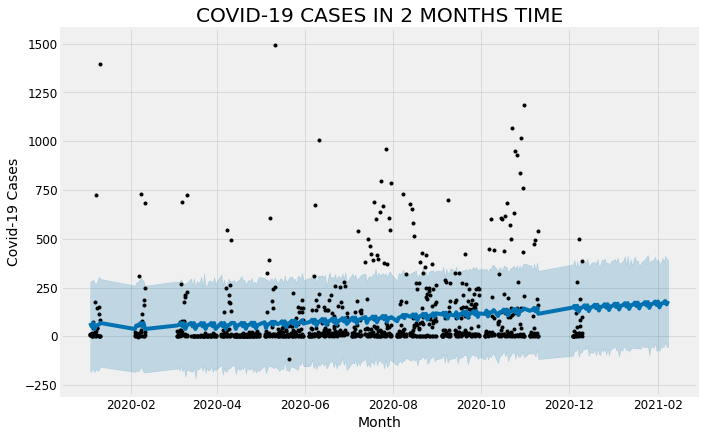

In [81]:

covid_cases_prophet.plot(covid_cases_forecast, xlabel = 'Month', ylabel = 'Covid-19 Cases')
plt.title('COVID-19 CASES IN 2 MONTHS TIME');

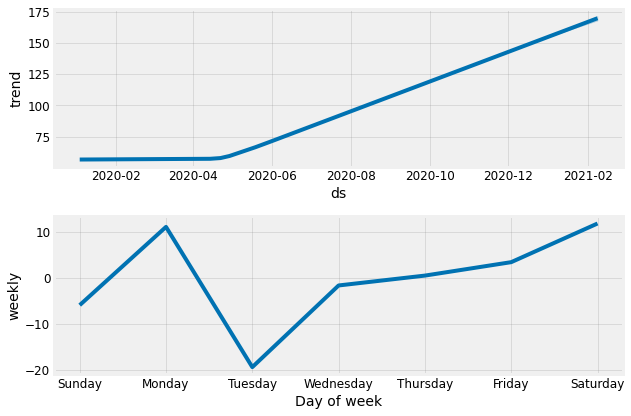

In [82]:
#To forecast components
fig2 = covid_cases_prophet.plot_components(covid_cases_forecast)

In [83]:
#An interactive figure of the forecast and components can be created with plotly
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(covid_cases_prophet, covid_cases_forecast)

In [84]:
#Interactive components
plot_components_plotly(covid_cases_prophet, covid_cases_forecast)

## **Forecasting COVID-19 Cases in Kenya**

In [85]:
kenya_df = data[(data.countriesAndTerritories == 'Kenya')]
kenya_df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26946,2020-06-11,6,11,2020,1008,21,Kenya,KE,KEN,52573967.0,Africa,23.553482
26947,2020-05-11,5,11,2020,1494,12,Kenya,KE,KEN,52573967.0,Africa,23.667607


## **Fitting the Prophet Models for Kenya**

In [86]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
kenya_covid_cases = kenya_df.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
kenya_covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
kenya_covid_cases_prophet.fit(kenya_covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months in Kenya**

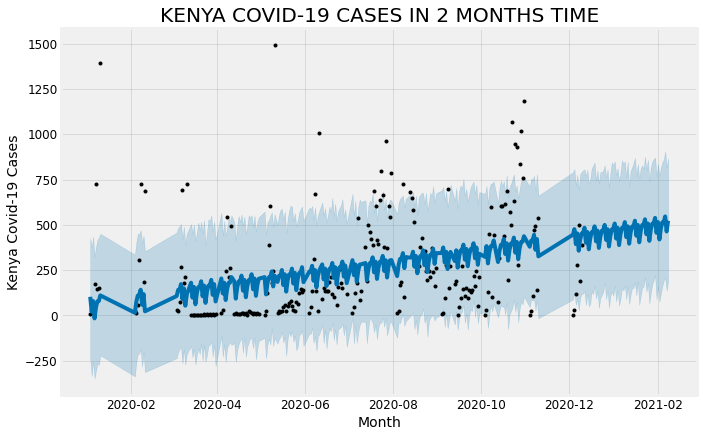

In [87]:
# Make a future dataframe for 2 months
kenya_covid_cases_forecast = kenya_covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
kenya_covid_cases_forecast = kenya_covid_cases_prophet.predict(kenya_covid_cases_forecast)
kenya_covid_cases_prophet.plot(kenya_covid_cases_forecast, xlabel = 'Month', ylabel = 'Kenya Covid-19 Cases')
plt.title('KENYA COVID-19 CASES IN 2 MONTHS TIME');



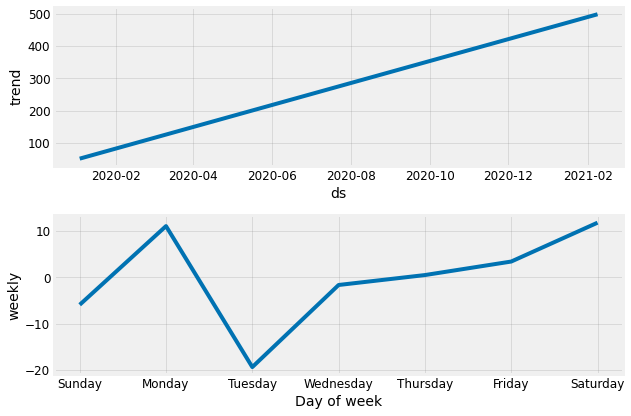

In [88]:
#To forecast components
fig2 = covid_cases_prophet.plot_components(kenya_covid_cases_forecast)

In [89]:
#An interactive figure of the forecast can be created with plotly
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(kenya_covid_cases_prophet, kenya_covid_cases_forecast)

In [90]:
#Interactive figure of components can be created with component_plotly
plot_components_plotly(kenya_covid_cases_prophet, kenya_covid_cases_forecast)

## **Forecasting COVID-19 Cases in Rwanda**

In [91]:
rwanda_df = data[(data.countriesAndTerritories == 'Rwanda')]
rwanda_df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
41181,2020-06-11,6,11,2020,18,1,Rwanda,RW,RWA,12626938.0,Africa,1.385926
41182,2020-05-11,5,11,2020,12,0,Rwanda,RW,RWA,12626938.0,Africa,1.282971


## **Fitting the Prophet Models for Rwanda**

In [92]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
rwanda_covid_cases = rwanda_df.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
rwanda_covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
rwanda_covid_cases_prophet.fit(rwanda_covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


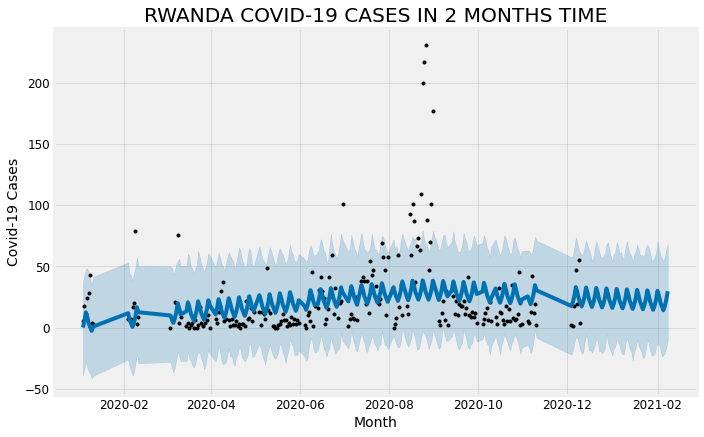

In [93]:
# Make a future dataframe for 2 months
rwanda_covid_cases_forecast = rwanda_covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
rwanda_covid_cases_forecast = rwanda_covid_cases_prophet.predict(rwanda_covid_cases_forecast)
rwanda_covid_cases_prophet.plot(rwanda_covid_cases_forecast, xlabel = 'Month', ylabel = 'Covid-19 Cases')
plt.title('RWANDA COVID-19 CASES IN 2 MONTHS TIME');

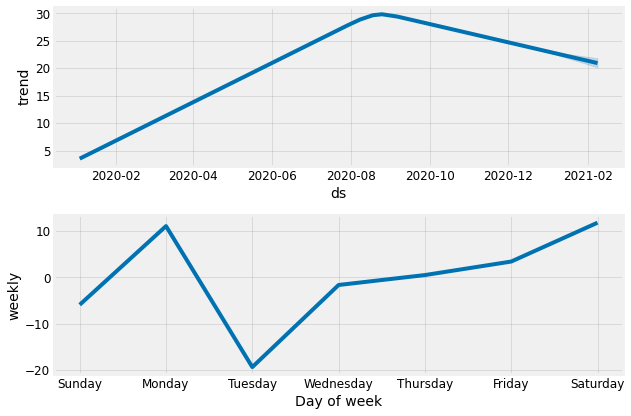

In [94]:
#To forecast components
fig2 = covid_cases_prophet.plot_components(rwanda_covid_cases_forecast)

In [95]:
#An interactive figure of the forecast can be created with plotly
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(rwanda_covid_cases_prophet, rwanda_covid_cases_forecast)

In [96]:
#Interactive figure of components can be created with component_plotly
plot_components_plotly(rwanda_covid_cases_prophet, rwanda_covid_cases_forecast)

## **Forecasting COVID-19 Cases in South Sudan**

In [97]:
SS_df = data[(data.countriesAndTerritories == 'South_Sudan')]
SS_df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
45660,2020-06-11,6,11,2020,2,0,South_Sudan,SS,SSD,11062114.0,Africa,0.65991
45661,2020-05-11,5,11,2020,3,0,South_Sudan,SS,SSD,11062114.0,Africa,0.65991


## **Fitting the Prophet Models for South Sudan**

In [98]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
SS_covid_cases = SS_df.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
SS_covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
SS_covid_cases_prophet.fit(SS_covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months in South Sudan**

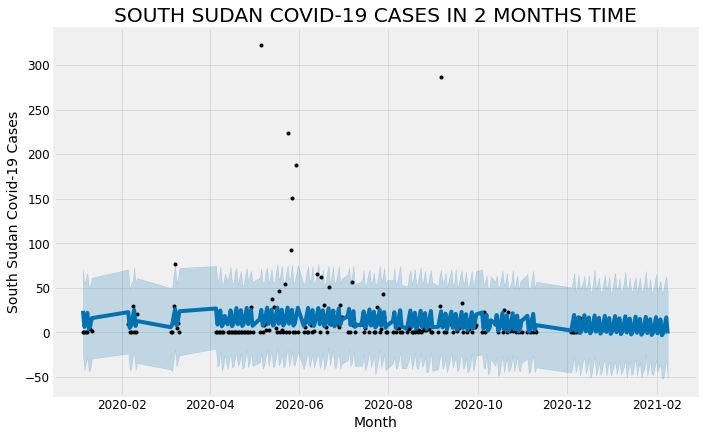

In [99]:
# Make a future dataframe for 2 months
SS_covid_cases_forecast = SS_covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
SS_covid_cases_forecast = SS_covid_cases_prophet.predict(SS_covid_cases_forecast)
SS_covid_cases_prophet.plot(SS_covid_cases_forecast, xlabel = 'Month', ylabel = 'South Sudan Covid-19 Cases')
plt.title('SOUTH SUDAN COVID-19 CASES IN 2 MONTHS TIME');

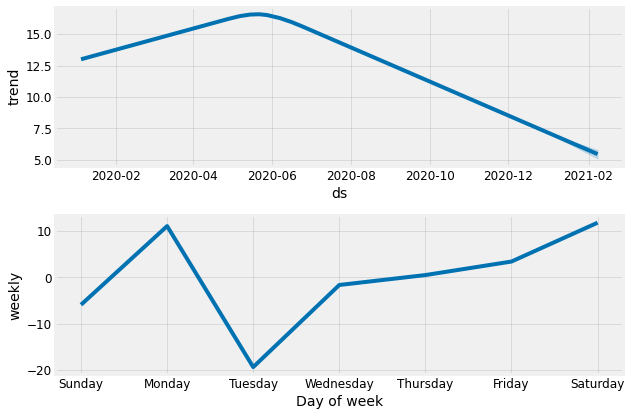

In [100]:
#To forecast components
fig2 = covid_cases_prophet.plot_components(SS_covid_cases_forecast)

In [101]:
#An interactive figure of the forecast can be created with plotly
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(SS_covid_cases_prophet, SS_covid_cases_forecast)

In [102]:
#Interactive figure of components can be created with component_plotly
plot_components_plotly(SS_covid_cases_prophet, SS_covid_cases_forecast)

## **Forecasting COVID-19 Cases in Uganda**

In [103]:
uganda_df = data[(data.countriesAndTerritories == 'Uganda')]
uganda_df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
50034,2020-06-11,6,11,2020,217,0,Uganda,UG,UGA,44269587.0,Africa,5.708208
50035,2020-05-11,5,11,2020,252,2,Uganda,UG,UGA,44269587.0,Africa,5.461989


## **Fitting the Prophet Models for Uganda**

In [104]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
uganda_covid_cases = uganda_df.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
uganda_covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
uganda_covid_cases_prophet.fit(uganda_covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months in Uganda**

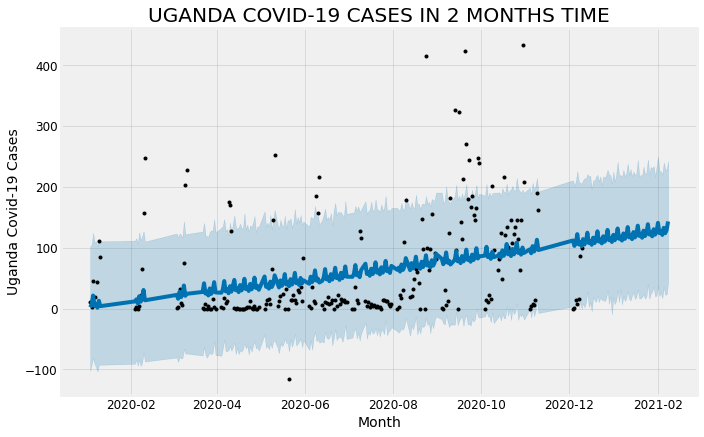

In [105]:
# Make a future dataframe for 2 months
uganda_covid_cases_forecast = uganda_covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
uganda_covid_cases_forecast = uganda_covid_cases_prophet.predict(uganda_covid_cases_forecast)
uganda_covid_cases_prophet.plot(uganda_covid_cases_forecast, xlabel = 'Month', ylabel = 'Uganda Covid-19 Cases')
plt.title('UGANDA COVID-19 CASES IN 2 MONTHS TIME');

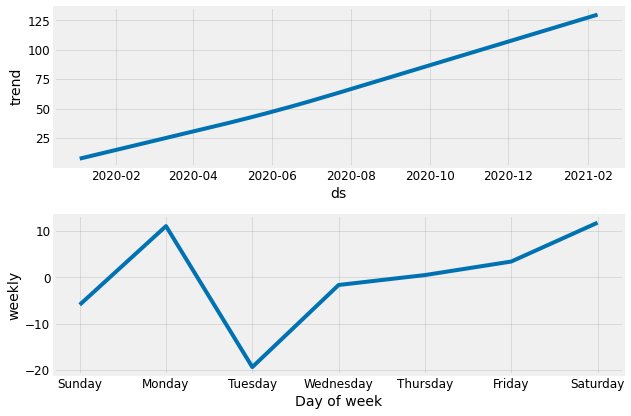

In [106]:
#To forecast components
fig2 = covid_cases_prophet.plot_components(uganda_covid_cases_forecast)

In [107]:
#An interactive figure of the forecast can be created with plotly
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(uganda_covid_cases_prophet, uganda_covid_cases_forecast)

In [108]:
#Interactive figure of components can be created with component_plotly
plot_components_plotly(uganda_covid_cases_prophet, uganda_covid_cases_forecast)